# Load packages

In [1]:
import keras
from keras import Sequential
from keras.layers import Dense 
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot, plot_model
from IPython.display import SVG

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from jupyterthemes import jtplot
jtplot.style()

Using TensorFlow backend.


# Load mnist data

In [2]:
# load mnist data and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train
y_train = y_train
x_test = x_test
y_test = y_test

# Explore the data

In [3]:
# shape of mnist data
print("Shape of x_train:",x_train.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [4]:
# min & max
print('minimum value:',np.min(x_train[0]), 
      '\nmaximum value:',np.max(x_train[0]), 
      '\n',x_train[0])

minimum value: 0 
maximum value: 255 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0

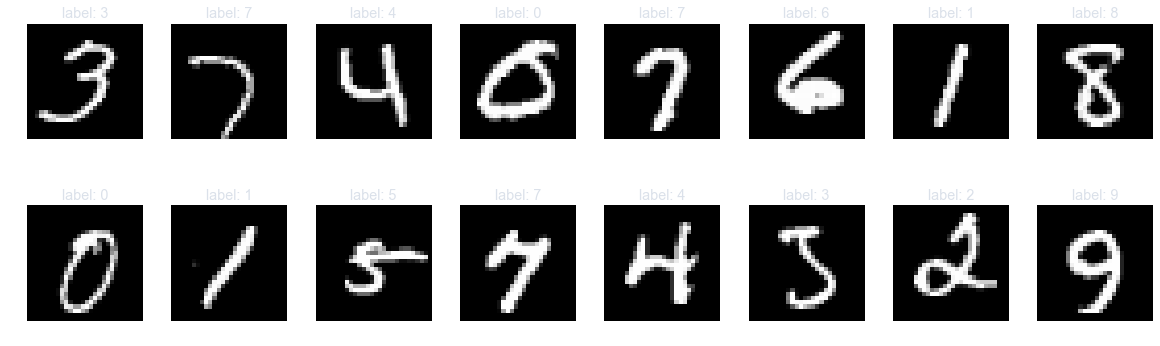

In [5]:
# sample images and correspoding label
def plot_images(number_of_samples, data_set = x_train):
    
    if np.array_equal(data_set, x_train):
        label = y_train
    else:
        label = y_test
        
    number_of_samples = number_of_samples//8*8 
    fig, ax = plt.subplots(number_of_samples//8, 8, figsize=(16,5), constrained_layout = True)
    num = np.random.choice(len(data_set), number_of_samples, replace=False)
    
    for i,j in enumerate(num):
        ax[i//8, i%8].imshow(data_set[j], cmap='gray')
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(f"label: {label[j]}")
    plt.show()    
    
plot_images(16, x_train)

![eight](./eight.png)

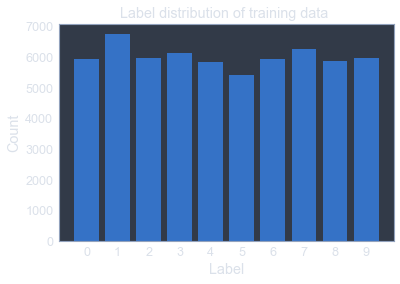

In [6]:
# plot label distributions of training set
plt.title('Label distribution of training data ')
plt.bar(range(10), np.bincount(y_train))
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(False)

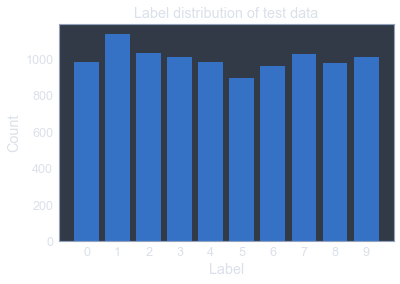

In [7]:
# plot label distributions of test set
plt.title('Label distribution of test data')
plt.bar(range(10), np.bincount(y_test))
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(range(10))
plt.grid(False)

# Data preprocessing

In [8]:
# rescale the image data 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# reshape
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Set parameters

In [9]:
epochs = 10

# Model

![network](./network.png)

# Training and prediction

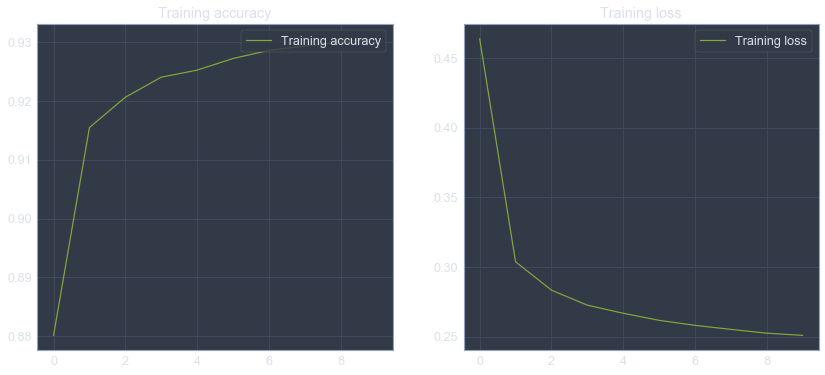

In [19]:
# plot results
hist = train_model.history
acc = hist['acc']
loss = hist['loss']
epochs = range(len(acc))
fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(epochs, acc, 'g', label='Training accuracy')
ax[0].set_title('Training accuracy')
ax[0].legend(loc=1)
ax[1].plot(epochs, loss, 'g', label='Training loss')
ax[1].set_title('Training loss')
ax[1].legend(loc=1)
plt.show()


# Visualize model

In [20]:
# plot_model(model, to_file='model.png', show_shapes=True, rankdir='TB')

# # Arguments
# #         model: A Keras model instance
# #         to_file: File name of the plot image.
# #         show_shapes: whether to display shape information.
# #         show_layer_names: whether to display layer names.
# #         rankdir: `rankdir` argument passed to PyDot,
# #             a string specifying the format of the plot:
# #             'TB' creates a vertical plot;
# #             'LR' creates a horizontal plot.